In [20]:
import pandas as pd

data = pd.read_csv("D:/Data Mining/HW1/character-deaths.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [21]:
data = data.drop(['Book of Death', 'Death Chapter'], axis = 1)
data.columns = ['Name', 'Allegiances', 'Death_Year', 'Book_Intro_Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC', 'DwD']

data = data.fillna(0)

isdeath = []
for row in data.itertuples():
    if row.Death_Year == 0:
        isdeath.append(0)
    else:
        isdeath.append(1)
data['Death_Year'] = isdeath
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death_Year          917 non-null    int64  
 3   Book_Intro_Chapter  917 non-null    float64
 4   Gender              917 non-null    int64  
 5   Nobility            917 non-null    int64  
 6   GoT                 917 non-null    int64  
 7   CoK                 917 non-null    int64  
 8   SoS                 917 non-null    int64  
 9   FfC                 917 non-null    int64  
 10  DwD                 917 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 78.9+ KB


In [22]:
allegiances = pd.unique(data['Allegiances'])
dummy = pd.DataFrame(0, index = range(len(data)), columns = allegiances)

for idx, row in enumerate(data.itertuples()):
    dummy.at[idx, row.Allegiances] = 1
data = pd.concat([data, dummy], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death_Year          917 non-null    int64  
 3   Book_Intro_Chapter  917 non-null    float64
 4   Gender              917 non-null    int64  
 5   Nobility            917 non-null    int64  
 6   GoT                 917 non-null    int64  
 7   CoK                 917 non-null    int64  
 8   SoS                 917 non-null    int64  
 9   FfC                 917 non-null    int64  
 10  DwD                 917 non-null    int64  
 11  Lannister           917 non-null    int64  
 12  None                917 non-null    int64  
 13  House Targaryen     917 non-null    int64  
 14  House Greyjoy       917 non-null    int64  
 15  Baratheon           917 non-null    int64  
 16  Night's 

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop(['Name', 'Allegiances', 'Death_Year', 'Book_Intro_Chapter'], axis = 1)
Y = data['Death_Year']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 74)

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5, random_state = 0)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [25]:
from sklearn import metrics

predict = model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, predict)
precision = metrics.precision_score(Y_test, predict)
recall = metrics.recall_score(Y_test, predict)
confusion_matrix = metrics.confusion_matrix(Y_test, predict)
print("Accurancy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}\n".format(accuracy, precision, recall))
print("Confusion Matrix\n")
print(confusion_matrix)

Accurancy: 0.665, Precision: 0.506, Recall: 0.538

Confusion Matrix

[[111  41]
 [ 36  42]]


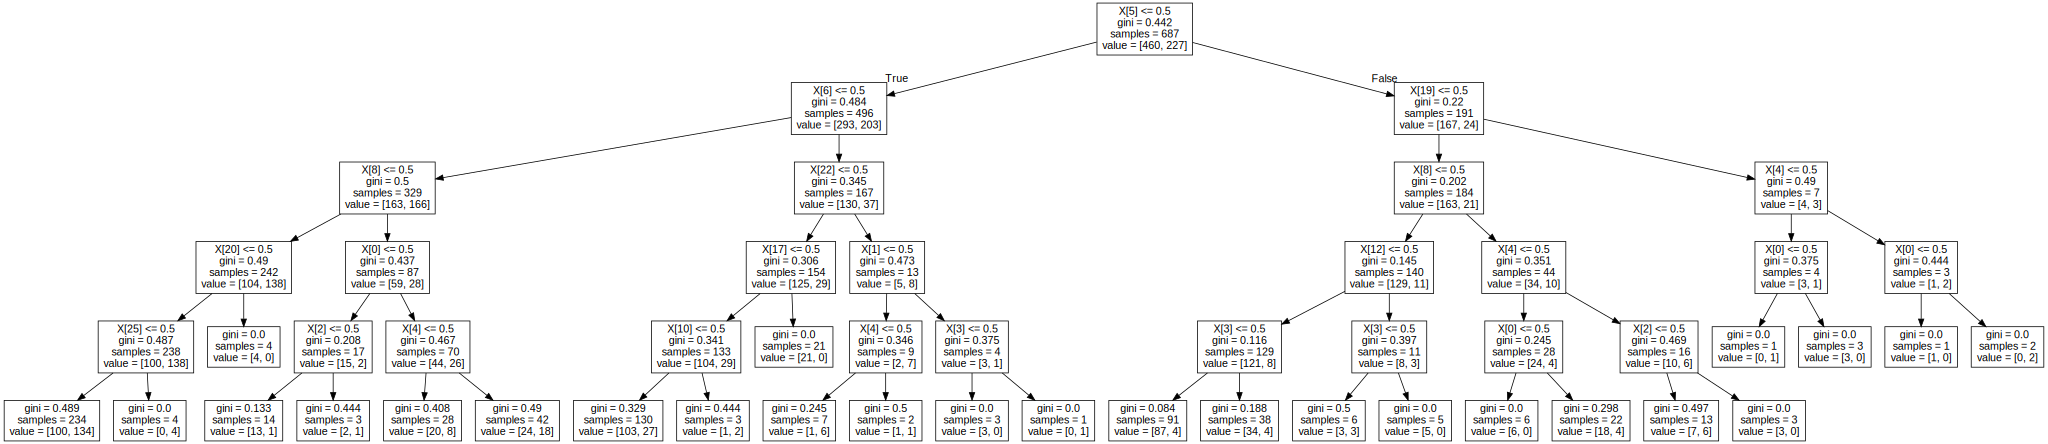

In [26]:
import graphviz
from sklearn import tree

graph_tree = tree.export_graphviz(model, out_file = None)
graph = graphviz.Source(graph_tree)
graph.render('GoT_tree')
graph

In [27]:
!jupyter nbconvert --to script HW1_109705013_賴郁忻.ipynb

[NbConvertApp] Converting notebook HW1_109705013_賴郁忻.ipynb to script
[NbConvertApp] Writing 1900 bytes to HW1_109705013_賴郁忻.py
